In [22]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

In [23]:
# Simulation parameters
prices = np.arange(500, 1001, 20)  # $500 to $700 in $20 increments
n_sim = 20000                     # Number of Monte Carlo iterations
P_ref = 600                       # Reference price for demand scaling

In [24]:
# Run simulations
results = []
for P in prices:
    # Sample uncertain parameters
    eps = np.random.normal(-1.2, 0.15, size=n_sim)                  # Elasticity
    D0 = np.random.triangular(150, 200, 250, size=n_sim)            # Baseline demand
    D = D0 * (P / P_ref) ** eps                                      # Simulated demand
    R = P * D                                                       # Simulated revenue
    
    # Summarize results
    results.append({
        'price': P,
        'mean_revenue': R.mean(),
        'p5_revenue': np.percentile(R, 5),
        'p95_revenue': np.percentile(R, 95)
    })

# Create DataFrame and display
df = pd.DataFrame(results).round(2)

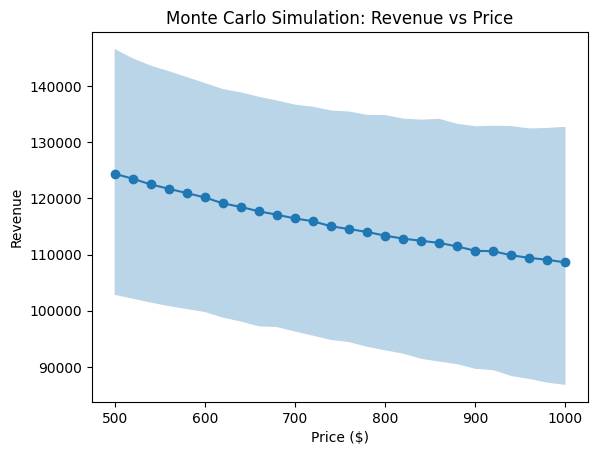

In [25]:
import matplotlib.pyplot as plt

# Plot
plt.figure()
plt.plot(df['price'], df['mean_revenue'], marker='o')
plt.fill_between(df['price'], df['p5_revenue'], df['p95_revenue'], alpha=0.3)
plt.xlabel('Price ($)')
plt.ylabel('Revenue')
plt.title('Monte Carlo Simulation: Revenue vs Price')
plt.show()